## Run valve experiment
#### Input valve metadata (at least valve number) and run experiment to add test data to dictionary

In [175]:
import os
import pickle
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns

from Experiment_Utils import Valve_Experiment,  valve_plot_dict_key

In [176]:
# FOR DEBUGGING - feel free to ignore.
%load_ext autoreload
%autoreload 2
from Experiment_Utils import Valve_Experiment,  valve_plot_dict_key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
file_dir = '/home/gmc/Python/Mod_DOE'
# file_name = 'Taguchi_valve_dict.pkl'
# file_name = 'initial_valve_dict.pkl'

file_name = 'valve_dict_2chamber.pkl'

Num_Experiment = 3 # trials

# want to iterate through 7 sets: 
# low_smsm, high_smsm, high_smlg, high_lglg, high_lg_, high_sm_, low_sm_

Power_Level = 'Low' # 'Low', 'High' (Duty Cycle of Low100/255, 255/255)
PreValve = 'sm' # 'sm', 'lg'
PostValve = '_' # 'sm', 'lg', '_'(none)

file_name = 'valve_dict_' + Power_Level + '_' + PreValve + PostValve + '.pkl'

if PreValve == 'lg':
    PreInflate = 10 #s
elif PreValve == 'sm':
    PreInflate = 0
if PreValve == 'lg' or PostValve == 'lg':
    Experiment_Runtime = 30 #s
else:
    Experiment_Runtime = 10 #s

MEMBRANE = False # True if using a membrane before valve (needs to be reset between trials)

In [178]:
# Set design number - FOR TAGUCHI DESIGNS
Valve_Design_Number = 13

In [179]:
os.chdir(file_dir)
try:
    starting_dict = pickle.load(open(file_name, 'rb'))
except:
    print('Making new dict')
    starting_dict = {}

In [180]:
print(f'The dict {file_name} currently has {len(starting_dict)} entries')
print(f'Current valve number: {Valve_Design_Number}')
raise RuntimeError("MAKE SURE YOU UPDATED THE VALVE NUMBER!!")

The dict valve_dict_Low_sm_.pkl currently has 13 entries
Current valve number: 13


RuntimeError: MAKE SURE YOU UPDATED THE VALVE NUMBER!!

In [181]:
# pre-inflate for 'PreInflate' seconds
temp_dict = {}
if PreInflate > 0:
    temp_dict = Valve_Experiment(temp_dict, PreInflate, 'TEMP_for_Baloon', power_level=Power_Level)

In [182]:
in_dict = starting_dict.copy()# Reload modules automatically before executing code
%load_ext autoreload
%autoreload 2

from Experiment_Utils import valve_plot_dict_key
in_key = 'Taguchi_Design_' + str(Valve_Design_Number)
in_key = 'TESTING_' + str(Valve_Design_Number)
# in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key, power_level=Power_Level, power_level=Power_Level)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
for i in range(Num_Experiment):
    # Rest between trials
    if MEMBRANE:
        input("Deflate before next test. Press enter to continue.")
    else:
        time.sleep(2)
    # Run experiment
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key, power_level=Power_Level)

Running pump for 10 seconds ...
Posting pressure vals, shape: 146
Key does not exist, creating new key
Running pump for 10 seconds ...
Posting pressure vals, shape: 91
Key exists, appending
Running pump for 10 seconds ...
Posting pressure vals, shape: 98
Key exists, appending


### We can view the data from the latest (nth) test

In [184]:
# Reload modules automatically before executing code
%load_ext autoreload
%autoreload 2

from Experiment_Utils import valve_plot_dict_key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TESTING_13_test_fig


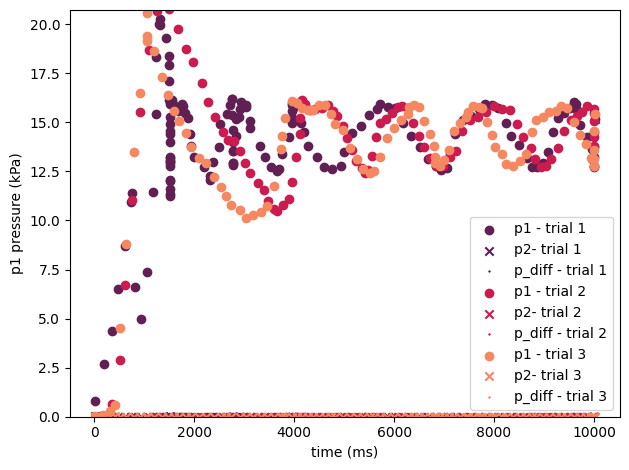

In [185]:
# load latest values
update_dict = in_dict # make sure plotted values are the ones updating
key = list(update_dict.keys())[-1]
# plot - TODO: pull the pressure differential from a function similar to valve_plot_dict_key, pull design parameters from Taguchi .csv, create entry for Ax
save_to = '/home/gmc/Documents/Valve_Design'
pic_name = in_key + "_test_fig"
print(pic_name)
valve_plot_dict_key(update_dict, key, save_loc = save_to)# , file_name = pic_name)

In [186]:
raise RuntimeError("MAKE SURE YOU WANT TO SAVE THIS DATA!!")

RuntimeError: MAKE SURE YOU WANT TO SAVE THIS DATA!!

In [187]:
os.chdir(file_dir)
pickle.dump(update_dict,open(file_name, 'wb'))

### Visualize the entire dataset

In [188]:
# load in the data
view_data = pickle.load(open(file_name, 'rb'))
print(view_data.keys())

dict_keys(['TESTING_0', 'TESTING_1', 'TESTING_2', 'TESTING_3', 'TESTING_4', 'TESTING_5', 'TESTING_6', 'TESTING_7', 'TESTING_8', 'TESTING_9', 'TESTING_10', 'TESTING_11', 'TESTING_12', 'TESTING_13'])


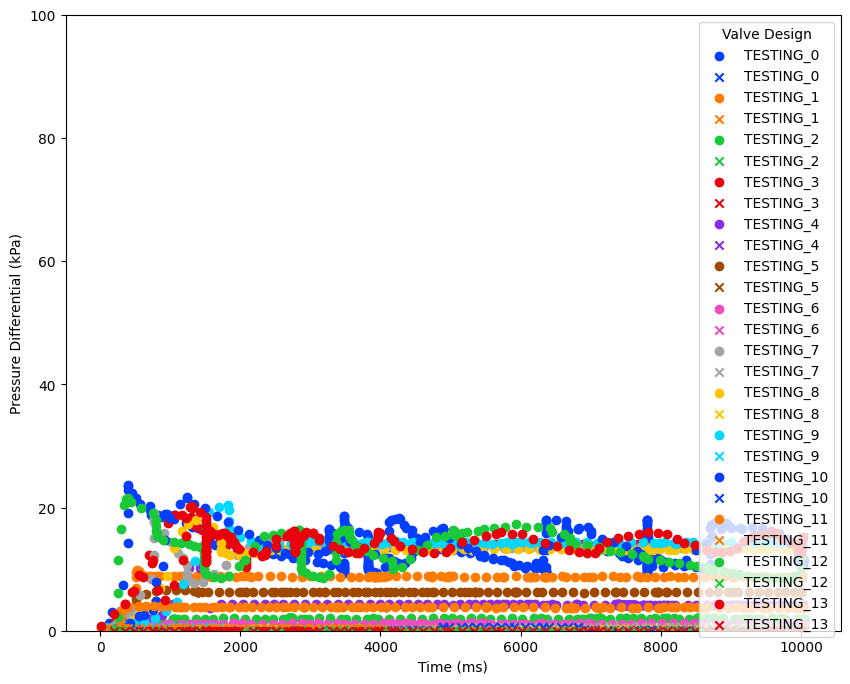

In [189]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
n = len(view_data.keys())

palette = sns.color_palette("bright", n)  # or try "Set2", "tab10", "deep", etc.

count = 0
for key in view_data.keys():
    this_test = view_data[key]
    printable = this_test[0]
    multiple = isinstance(this_test[0][1][0], list) # bool
    if multiple:
        p1_vals = np.array([x[0] for x in printable[1]])
        p2_vals = np.array([x[1] for x in printable[1]])
        ax.scatter(printable[0], p1_vals, label = key, color = palette[count])
        ax.scatter(printable[0], p2_vals, label = key, color = palette[count], marker= 'x')
    else:
        ax.scatter(printable[0], printable[1], label = key, color = palette[count])
    count += 1

ax.set_ylim(0, 100)
ax.set_ylabel('Pressure Differential (kPa)')
ax.set_xlabel('Time (ms)')
plt.legend(title = 'Valve Design', loc = 'upper right', bbox_to_anchor=(1, 1))
plt.show()
